# Analysis Of World Population Dataset 🌎 

## Table of Contents

1. [Introduction](#Introduction:)
2. [Data Exploration](#Data-Exploration:)
4. [Reading the .csv and deleting the CCA3 and Capital columns](#Reading-the-.csv-and-deleting-the-CCA3-and-Capital-columns:)
5. [Total Number of Countries in each Continent](#Total-Number-of-Countries-in-each-Continent:)
6. [Pie Graph of count and percentage of population of each continent in different years](#Pie-Graph-of-count-and-percentage-of-population-of-each-continent-in-different-years:)
7. [Map Visualisation of Population by Years](#Map-Visualisation-of-Population-by-Years:)
8. [TOP 10 highest population Countries](#TOP-10-highest-population-Countries:)
9. [Population Growth](#Population-Growth:)
10. [Land Available per Country](#Land-Available-per-Country:)
11. [The country with the most available land per person](#The-country-with-the-most-available-land-per-person:)

# Introduction:

The data is from US Census Bureau. We are given the population of every conutries from year 1970,1980,1990,2000,2010,2015,2020 and 2022. We are also given the Population Density, Area (km^2) of the country, Growth Rate, etc.

# Data Exploration:

Feature Description:

1. **Rank** - Rank of the paricular Country (Decided by Population).
2. **CCA3** - 3 Digit code of a Particular Country.
3. **Country** - Name of the Country.
4. **Continent** - Name of the Continent where the Country Belongs.
5. **2022 population** - The Population of the Country in year 2022.
6. **2020 population** - The Population of the Country in year 2020.
7. **2015 population** - The Population of the Country in year 2015.
8. **2010 population** - The Population of the Country in year 2010.
9. **2000 population** - The Population of the Country in year 2000.
10. **1990 population** - The Population of the Country in year 1990.
11. **1980 population** - The Population of the Country in year 1980.
12. **1970 population** - The Population of the Country in year 1970.
13. **Area** - The land area of the Country (measured in km^2).
14. **Density** - The Population Density of the Country (measured in per km^2).
15. **Growth Rate** - The Population Growth Rate of the Country.
16. **World Population Percentage** - The percentage of the World Population residing in that Country.

# Necessary Libraries:

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# **Reading the .csv and deleting the CCA3 and Capital columns:**

In [3]:
df=pd.read_csv('./data.csv')
df.drop(['CCA3','Capital'],axis=1,inplace=True)
df

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,Wallis and Futuna,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,Western Sahara,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,Yemen,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,Zambia,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


# **Total Number of Countries in each Continent:**

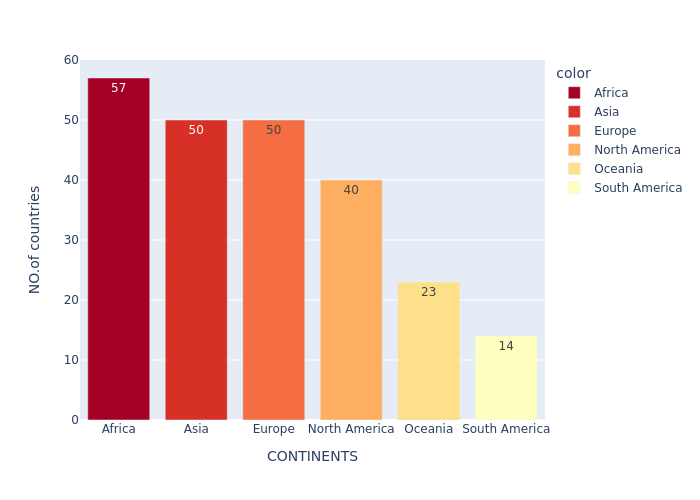

In [4]:
country_count=df['Continent'].value_counts()
fig=px.bar(y=country_count.values,
       x=country_count.index,
       color=country_count.index,
       color_discrete_sequence=px.colors.diverging.RdYlGn,
       text=country_count.values)
fig.update_layout(
xaxis_title='CONTINENTS',
yaxis_title='NO.of countries')

# fig.show()
fig.show("png")

# **Pie Graph of count and percentage of population of each continent in different years:**

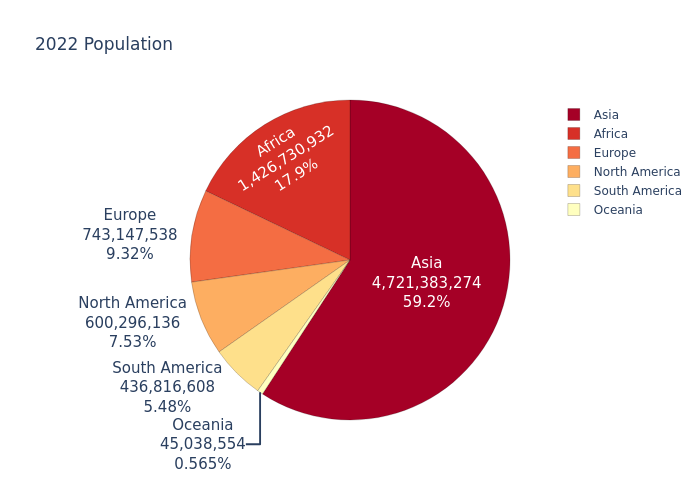

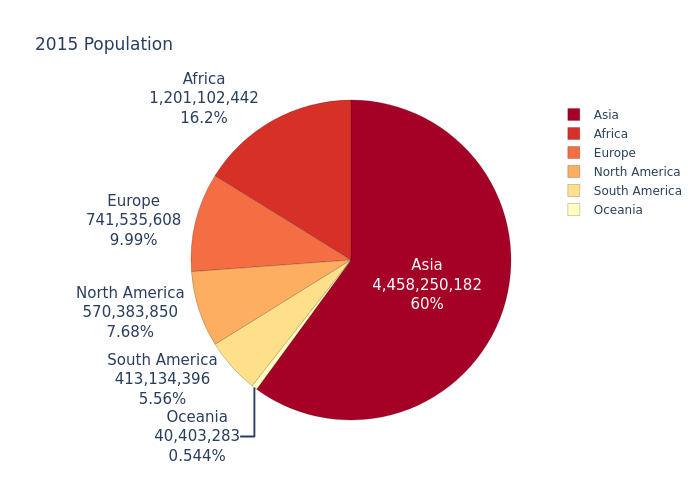

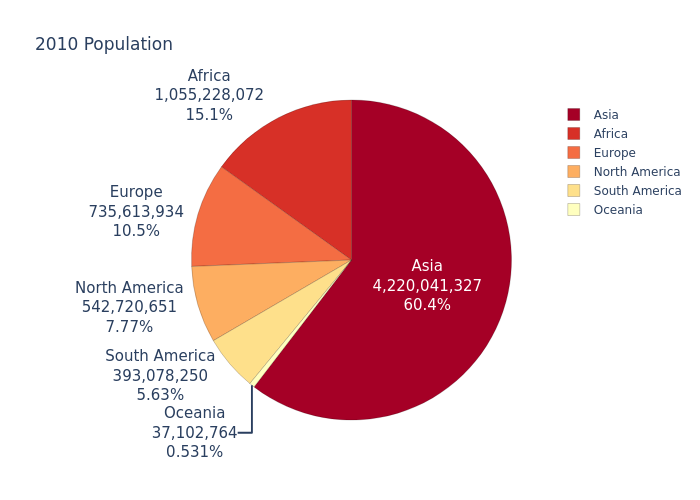

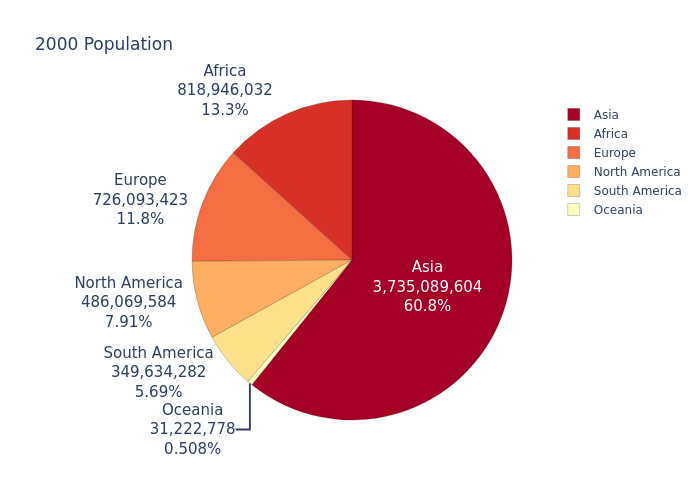

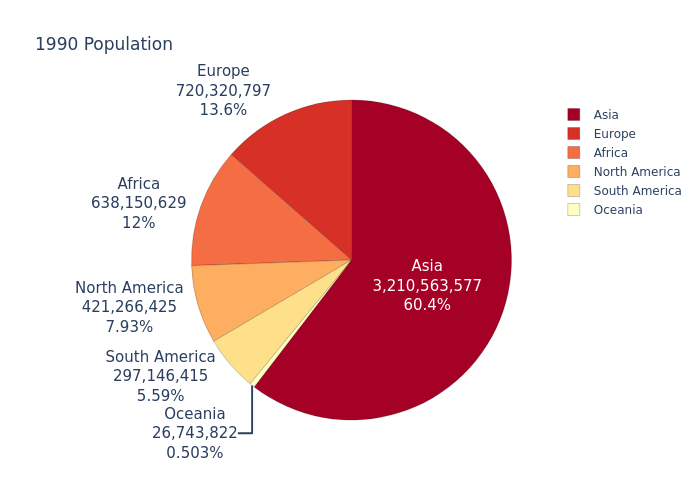

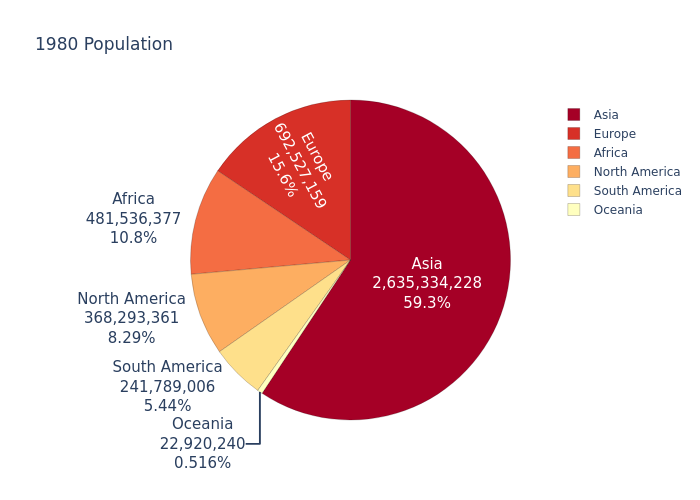

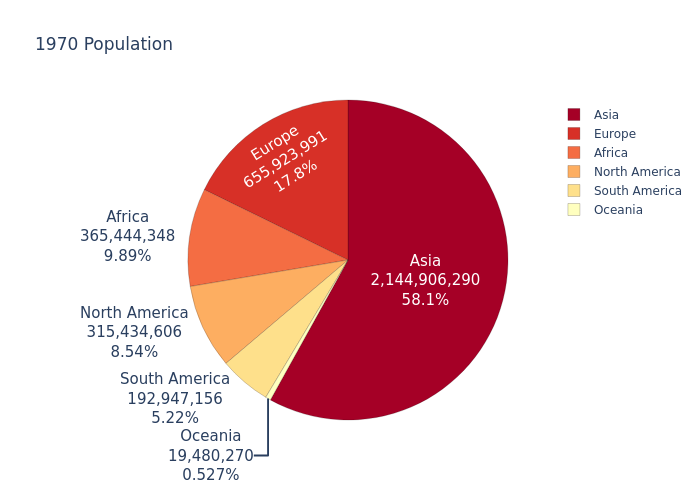

In [5]:
features=['2022 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for feature in features:
    Continents_population=df.groupby(by='Continent')[feature].sum().sort_values(ascending=False)
    fig = px.pie(values=Continents_population.values, 
             names=Continents_population.index, 
             color_discrete_sequence=px.colors.diverging.RdYlGn,
             title= feature)
    fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))
    fig.show("png")

# **Map Visualisation of Population by Years:**

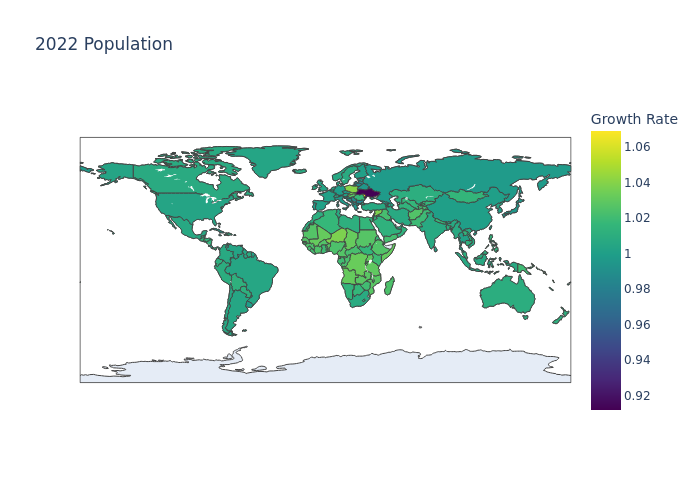

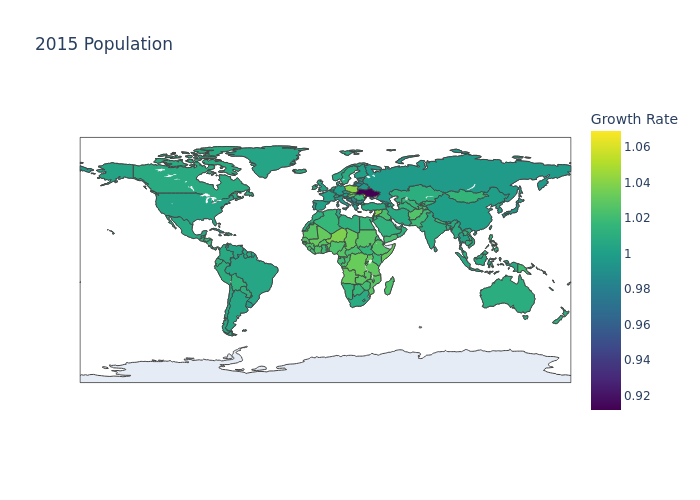

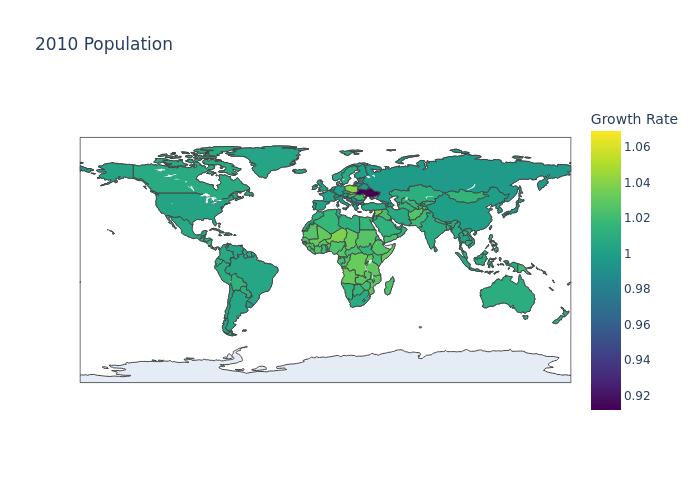

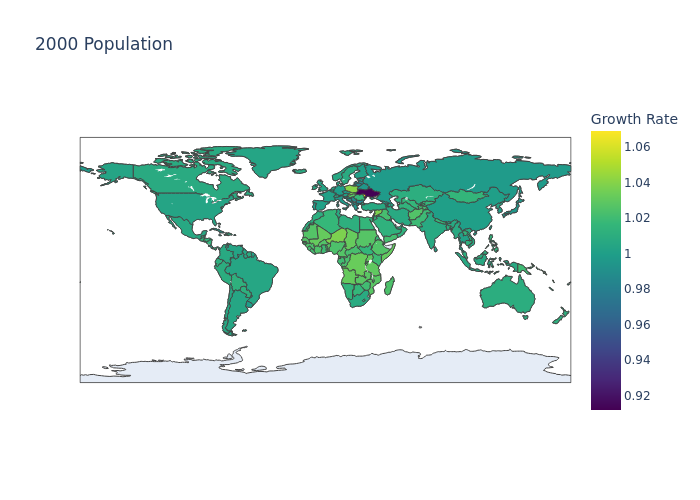

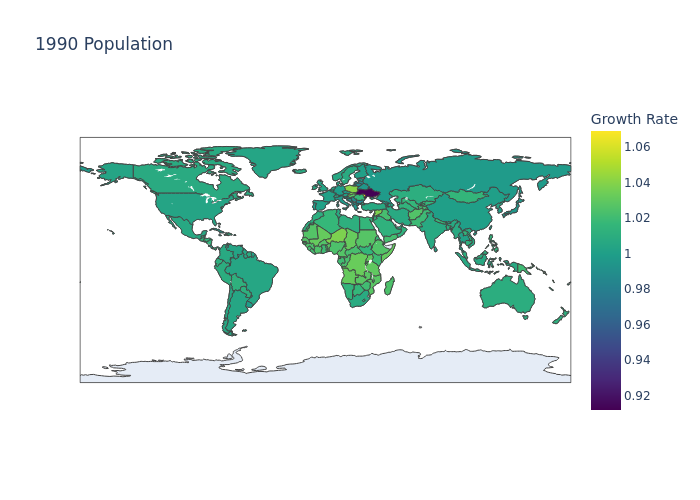

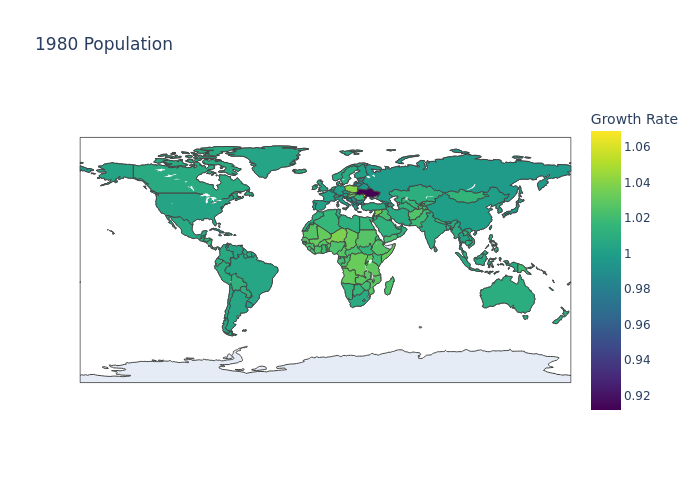

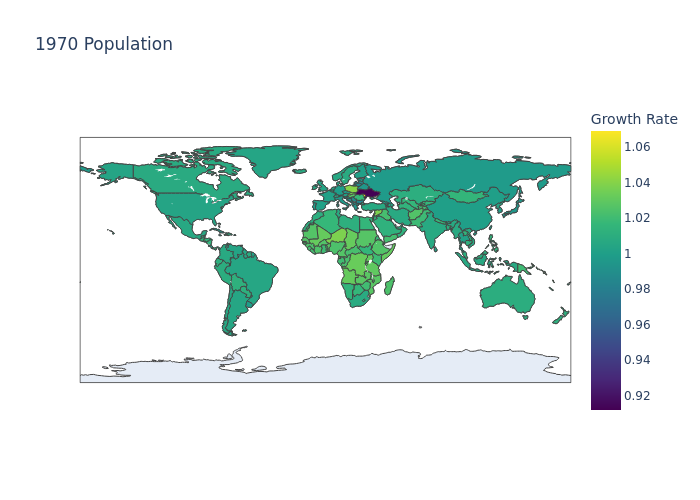

In [6]:
features=['2022 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for feature in features:
    
    fig = px.choropleth(df,
                    locations='Country/Territory',
                     locationmode='country names',
                     color='Growth Rate',
                     # we indicate the year we are interested in
                    hover_name='Country/Territory',
                    title=feature,
                    color_continuous_scale='Viridis')
    fig.show("png")

Although the population has increased over the past 10 years, there has not been a great change in the continents in percentage. Asia, Africa and Europe alone constitute more than 80% of the world's population.

# **TOP 10 highest population Countries:**

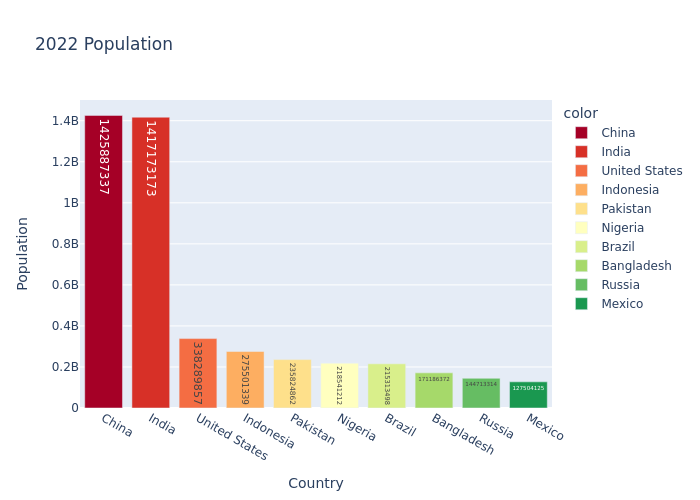

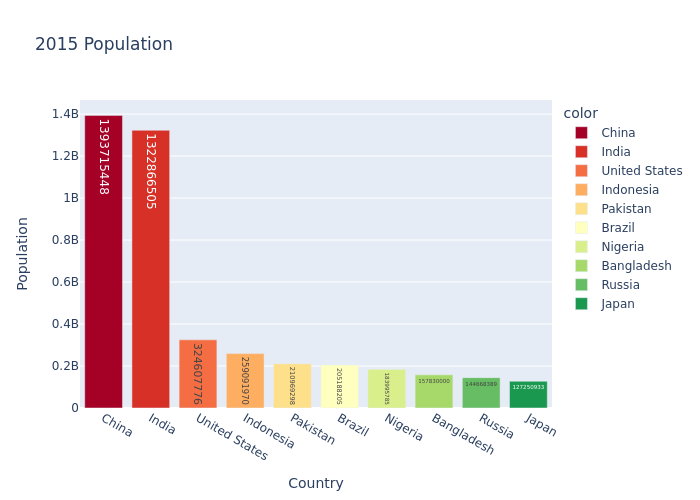

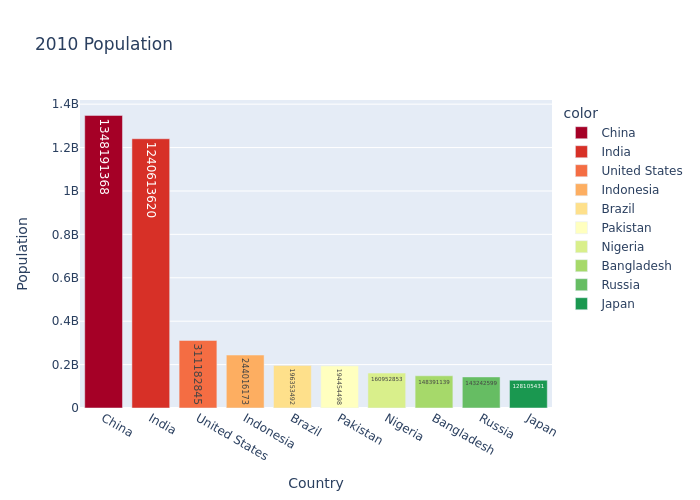

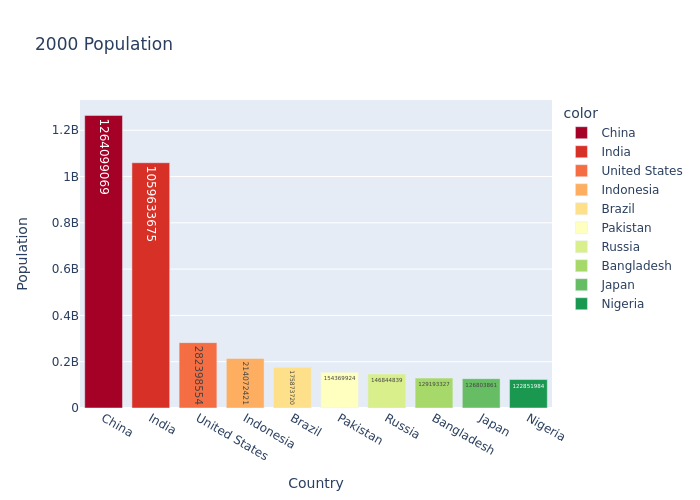

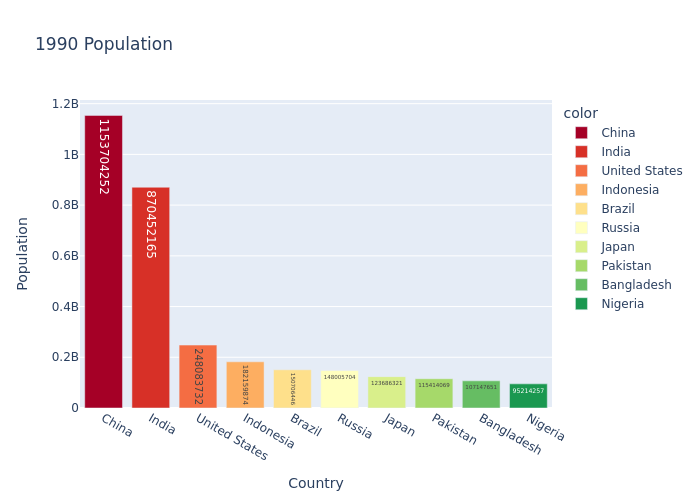

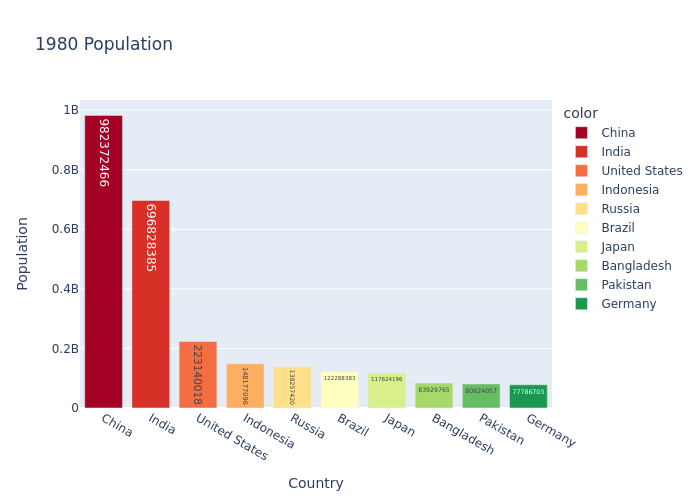

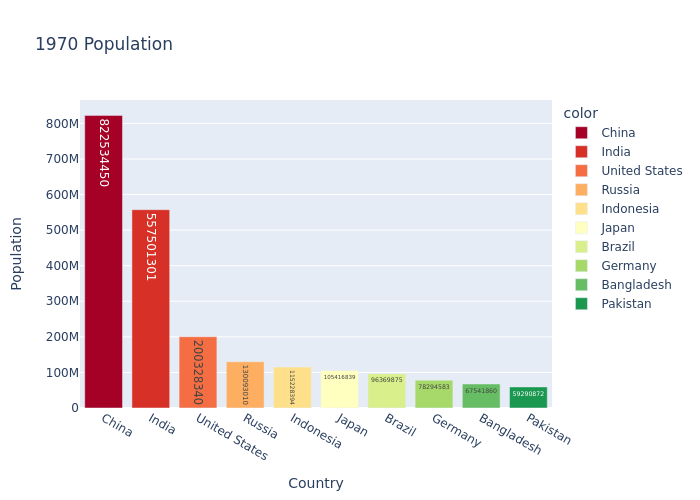

In [7]:
features=['2022 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for feature in features:
    country_population = df.groupby(by = 'Country/Territory')[feature].sum().sort_values(ascending=False).head(10)   
    fig=px.bar(x=country_population.index,
       y=country_population.values,
       color=country_population.index,
       color_discrete_sequence=px.colors.diverging.RdYlGn,
       text=country_population.values,
       title=feature)
    fig.update_layout(xaxis_title='Country',
                 yaxis_title='Population')
    fig.show("png")

# **Population Growth:**

As we can observe, India is top country where population growth is the highest among all preceded by China.

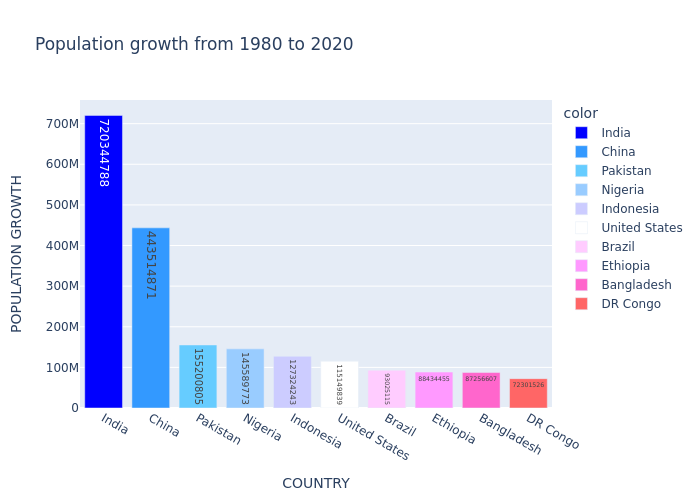

In [8]:
GROWTH=(df.groupby(by='Country/Territory')['2022 Population'].sum()-df.groupby(by='Country/Territory')['1980 Population'].sum()).sort_values(ascending=False).head(10)
fig=px.bar(x=GROWTH.index,
       y=GROWTH.values,
       color=GROWTH.index,
           color_discrete_sequence=px.colors.diverging.Picnic,
       text=GROWTH.values,
       title='Population growth from 1980 to 2020')
fig.update_layout(xaxis_title='COUNTRY',
                 yaxis_title='POPULATION GROWTH')
fig.show("png")

# **Land Available per Country:**

As expected, Russia is the main country with the most land and Vatican City is the one with the least land worldwide.

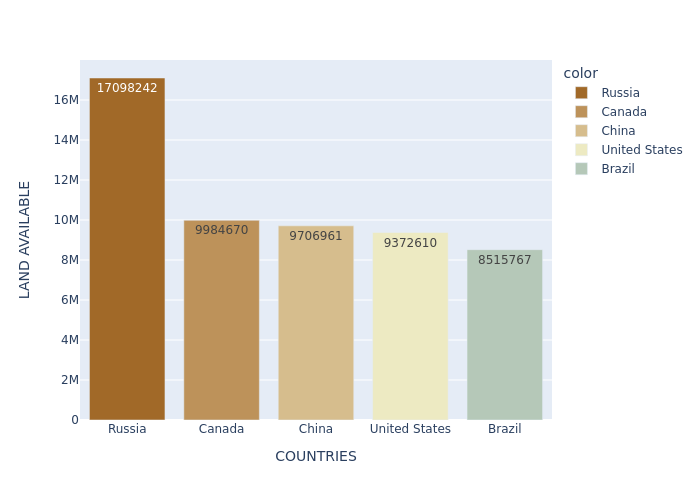

In [9]:
most_land=df.groupby(by='Country/Territory')['Area (km²)'].sum().sort_values(ascending=False).head(5)
fig=px.bar(x=most_land.sort_values(ascending=False).head(5).index,
            y=most_land.sort_values(ascending=False).head(5).values,
            color= most_land.sort_values(ascending=False).head(5).index,
            text= most_land.sort_values(ascending=False).head(5).values,
            color_discrete_sequence=px.colors.diverging.Earth)

fig.update_layout(xaxis_title='COUNTRIES',
                 yaxis_title='LAND AVAILABLE')
fig.show("png")

# **The country with the most available land per person:**

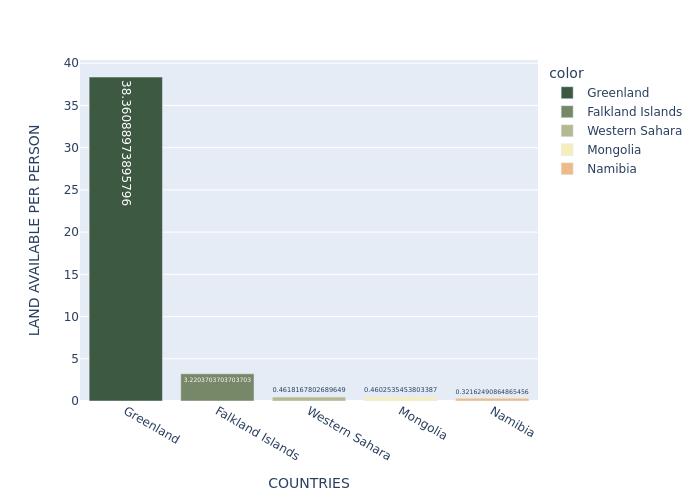

In [10]:
df['area_per_person']=df['Area (km²)'] / df['2022 Population']
area_per_person_incountry=df.groupby(by='Country/Territory')['area_per_person'].sum()
area_per_person_incountry.sort_values(ascending=False).head(5)
fig=px.bar(x=area_per_person_incountry.sort_values(ascending=False).head(5).index,
            y=area_per_person_incountry.sort_values(ascending=False).head(5).values,
            color=area_per_person_incountry.sort_values(ascending=False).head(5).index,
            text=area_per_person_incountry.sort_values(ascending=False).head(5).values,
            color_discrete_sequence=px.colors.diverging.Fall)
fig.update_layout(xaxis_title='COUNTRIES', yaxis_title='LAND AVAILABLE PER PERSON')
fig.show("png")